In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
import datetime as dt
import matplotlib.ticker as ticker

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
data=pd.read_csv('twitter training.csv')
data.head()

,Unnamed: 0,Channel,Response,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
display(data)

,Unnamed: 0,Channel,Response,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [18]:
# Get a concise summary of the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  74682 non-null  int64 
 1   Channel     74682 non-null  object
 2   Response    74682 non-null  object
 3   Text        73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [19]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [20]:
display(data)

,Channel,Response,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [21]:
# Detecting duplicates
duplicates = data[data.duplicated()]
duplicates

,Channel,Response,Text
20,Borderlands,Positive,that was the first borderlands session in a lo...
26,Borderlands,Negative,The biggest disappointment of my life came a y...
51,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
64,Borderlands,Neutral,.. [
146,Borderlands,Negative,"""What a bitch!"""
...,...,...,...
74528,Nvidia,Neutral,What next?
74589,Nvidia,Neutral,Heard people are having issues with ordering t...
74591,Nvidia,Neutral,you
74619,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Channel   74682 non-null  object
 1   Response  74682 non-null  object
 2   Text      73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [24]:
# Check the data types in the 'Text' column
print(data['Text'].apply(type).value_counts())

<class 'str'>      73996
<class 'float'>      686
Name: Text, dtype: int64


In [25]:
data['Text'] = data['Text'].astype(str)

In [26]:
# Perform sentiment analysis using TextBlob
data['polarity'] = data['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [27]:
# Categorize sentiment based on polarity scores
data['sentiment'] = data['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


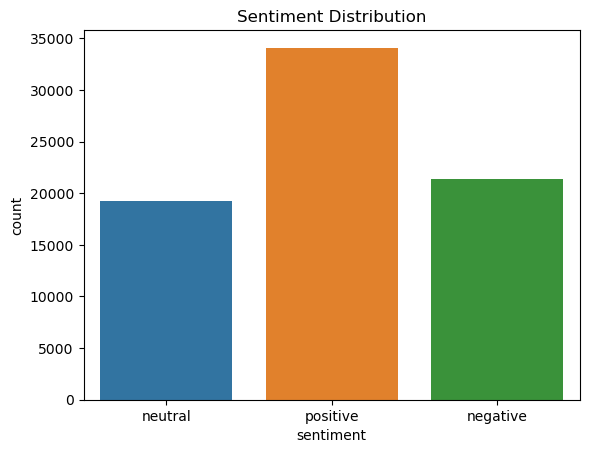

In [28]:
# Visualize sentiment distribution
sns.countplot(data['sentiment'])
plt.title('Sentiment Distribution')
plt.show()

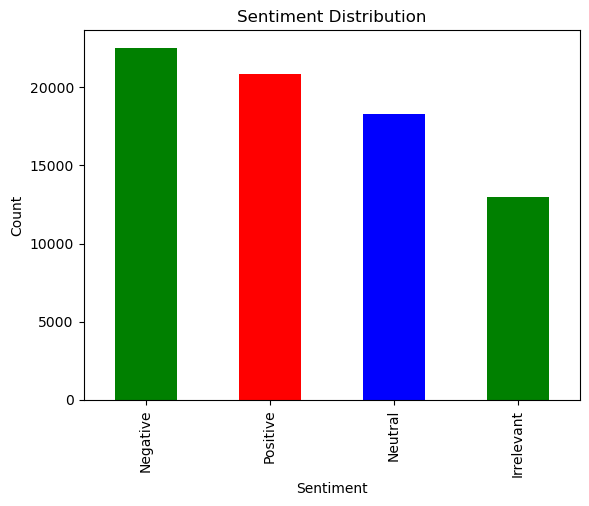

In [34]:
#Assuming 'Polarity' column contains sentiment polarity
sentiment_counts = data['Response'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])  # Assuming positive, negative, neutral
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

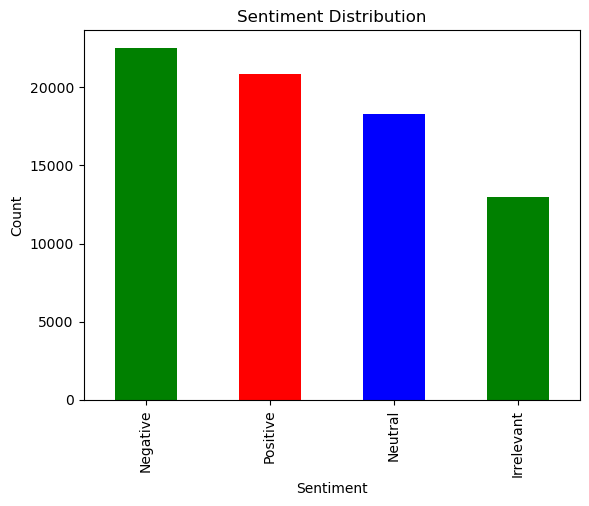

In [35]:
sentiment_counts = data['Response'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])  # Assuming different categories
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()